### Context

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective. 


### How can you help here?

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one’s chances of admission given the rest of the variables.

### Dataset:

Dataset Link: jamboree_admission.csv

### Column Profiling:

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)
 
### Concept Used:

- Exploratory Data Analysis
- Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import kstest
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from statsmodels.tools.eval_measures import mse,rmse
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv('../Datasets/Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

In [3]:
#Shape of data
df.shape

(500, 9)

In [4]:
# statistical Summary
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
#Complete Infiormation of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
#Data Types of all Attributes
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
#Missing Value Detection
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
#Dropping of Unneccessary Columns
df.drop('Serial No.', axis=1, inplace=True)

In [9]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

## Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

In [10]:
continous_features = ['GRE Score','TOEFL Score', "CGPA"]
cat_features = [col for col in df.columns if col not in continous_features]
cat_features

['University Rating', 'SOP', 'LOR ', 'Research', 'Chance of Admit ']

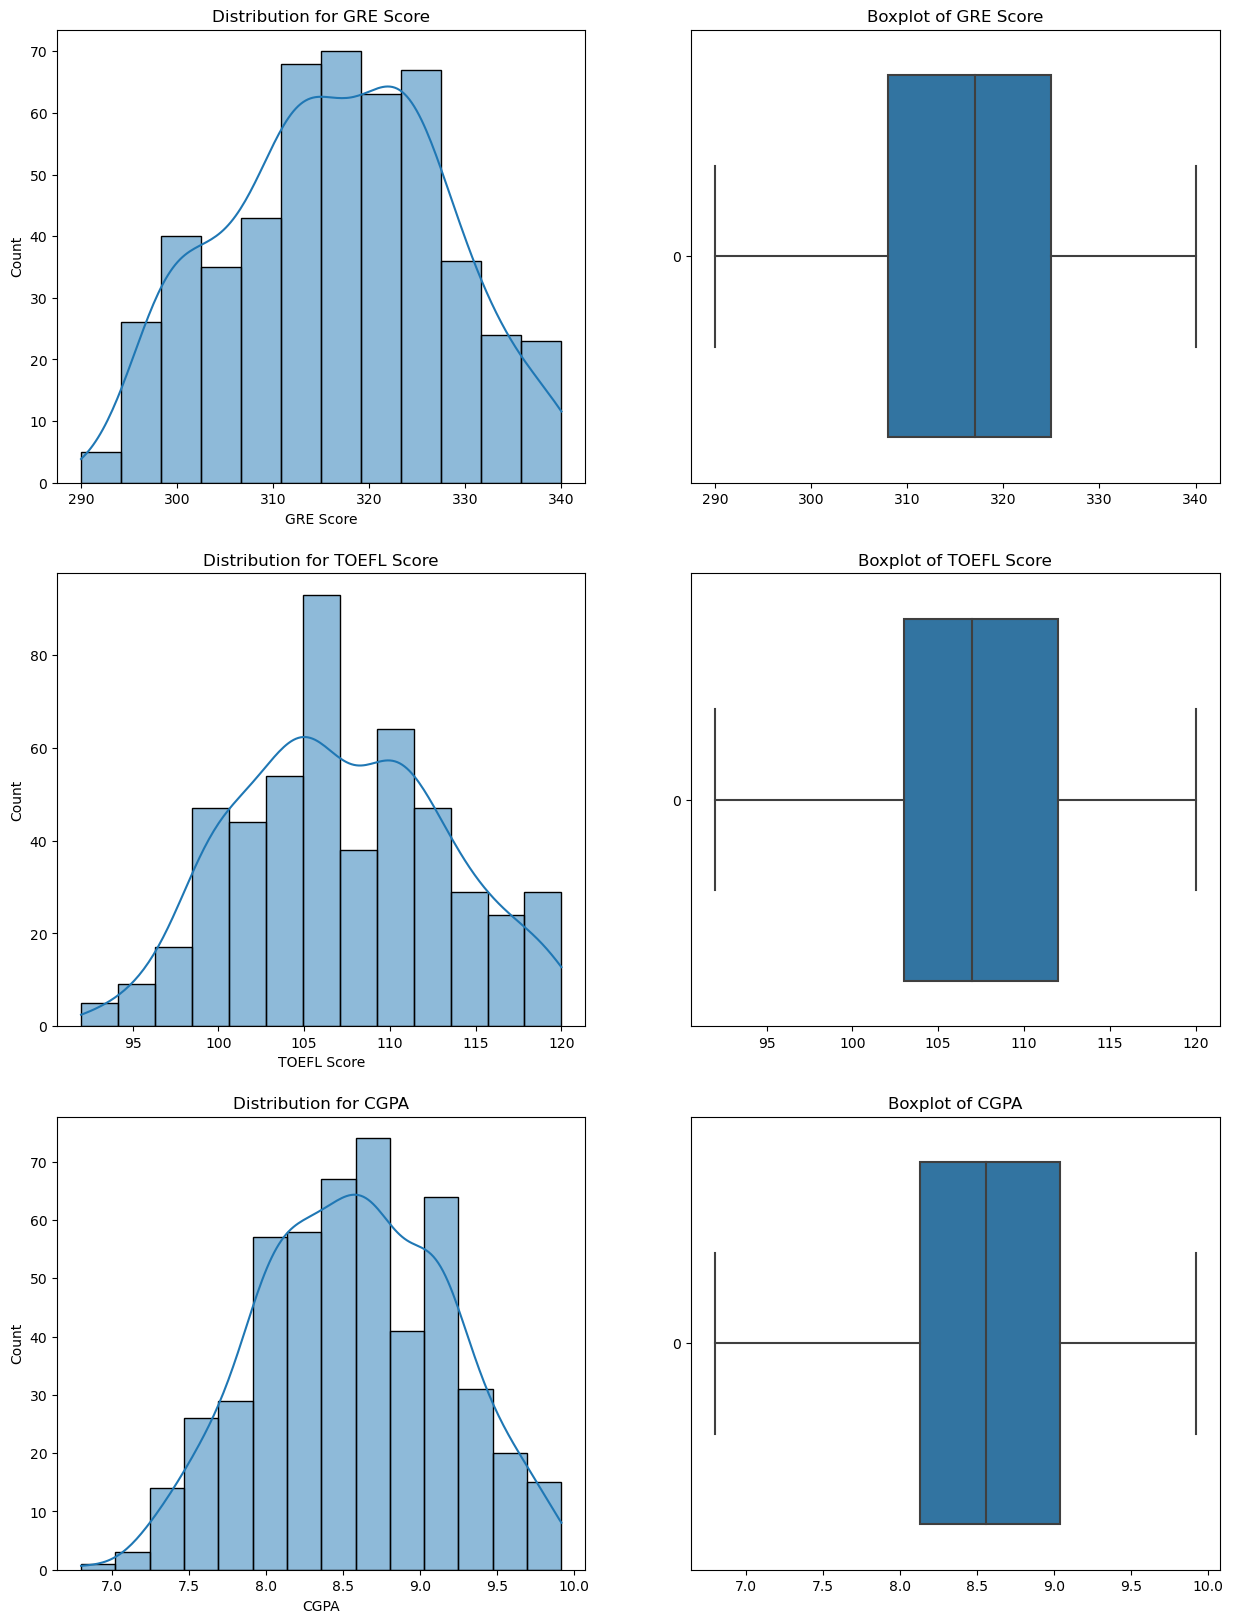

In [11]:
fig, axs = plt.subplots(len(continous_features),2,figsize=(15,20))
count = 0
for col in continous_features:
    sns.histplot(ax=axs[count,0], data = df[col], kde=True)
    axs[count,0].set_title('Distribution for '+ col)
    sns.boxplot(ax=axs[count,1], data= df[col], orient='h')
    axs[count,1].set_title('Boxplot of '+ col)
    count += 1

plt.show()
    

<div class="alert alert-success">
    <h3>Observation</h3>
        <p> &#10148; GRE Score, TOFEL Score, CGPA are almost normaly distributed & No outliers in data</p>    
</div>

## Bivariate Analysis (Relationships between important variables)

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

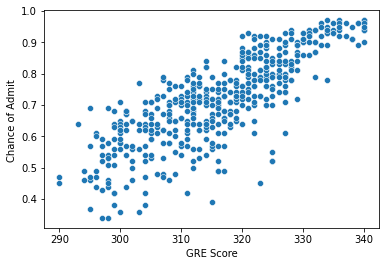

In [12]:
sns.scatterplot(data=df,x='GRE Score',y= 'Chance of Admit ')

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit '>

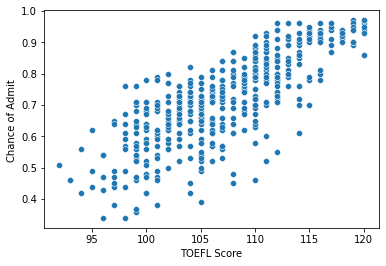

In [13]:
sns.scatterplot(data=df,x='TOEFL Score',y= 'Chance of Admit ')

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit '>

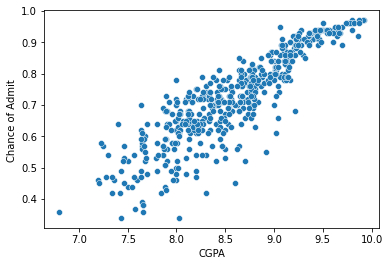

In [14]:
sns.scatterplot(data=df,x='CGPA',y= 'Chance of Admit ')

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit '>

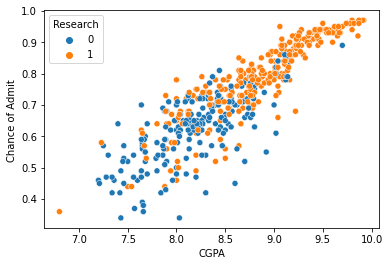

In [15]:
sns.scatterplot(data=df,x='CGPA',y= 'Chance of Admit ', hue='Research')

<div class="alert alert-success">&#10148; Chances of Admiting are much higher for people with research background than people without any research background</div>

In [16]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

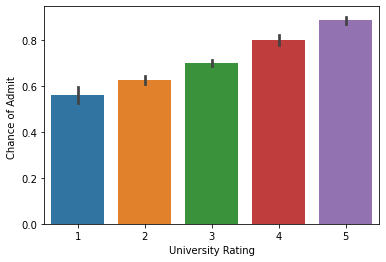

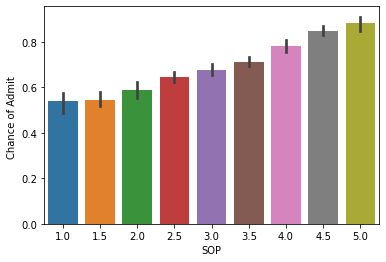

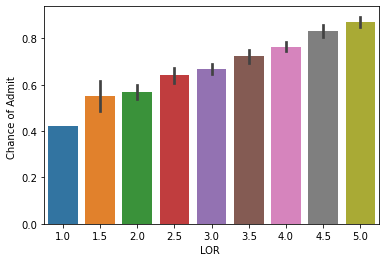

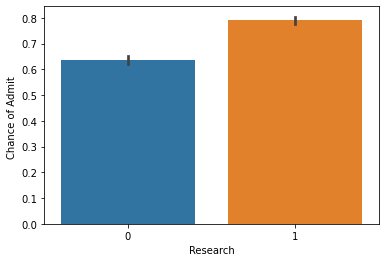

In [17]:
for col in cat_features[:-1]:
    sns.barplot(data=df,x=col,y= 'Chance of Admit ')
    plt.show()

In [18]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


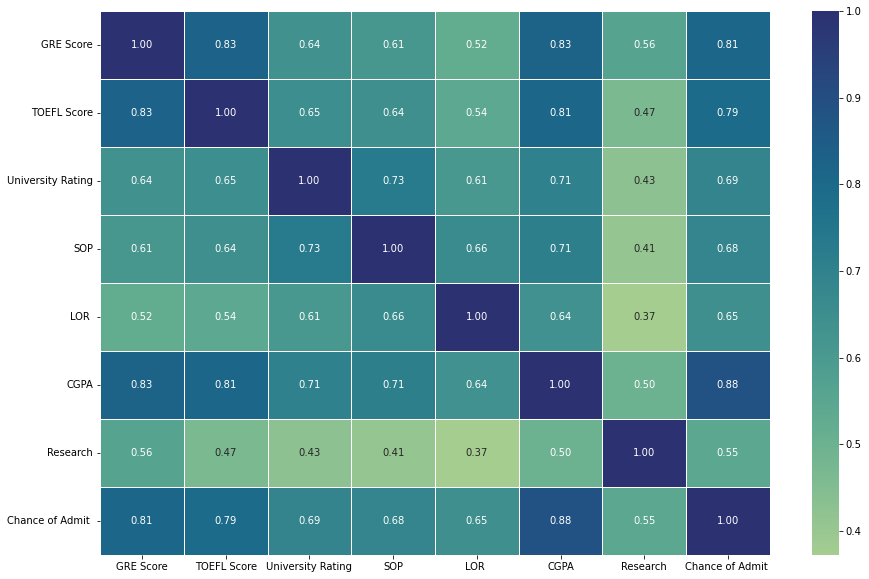

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='crest', linewidth='0.5')
plt.show()

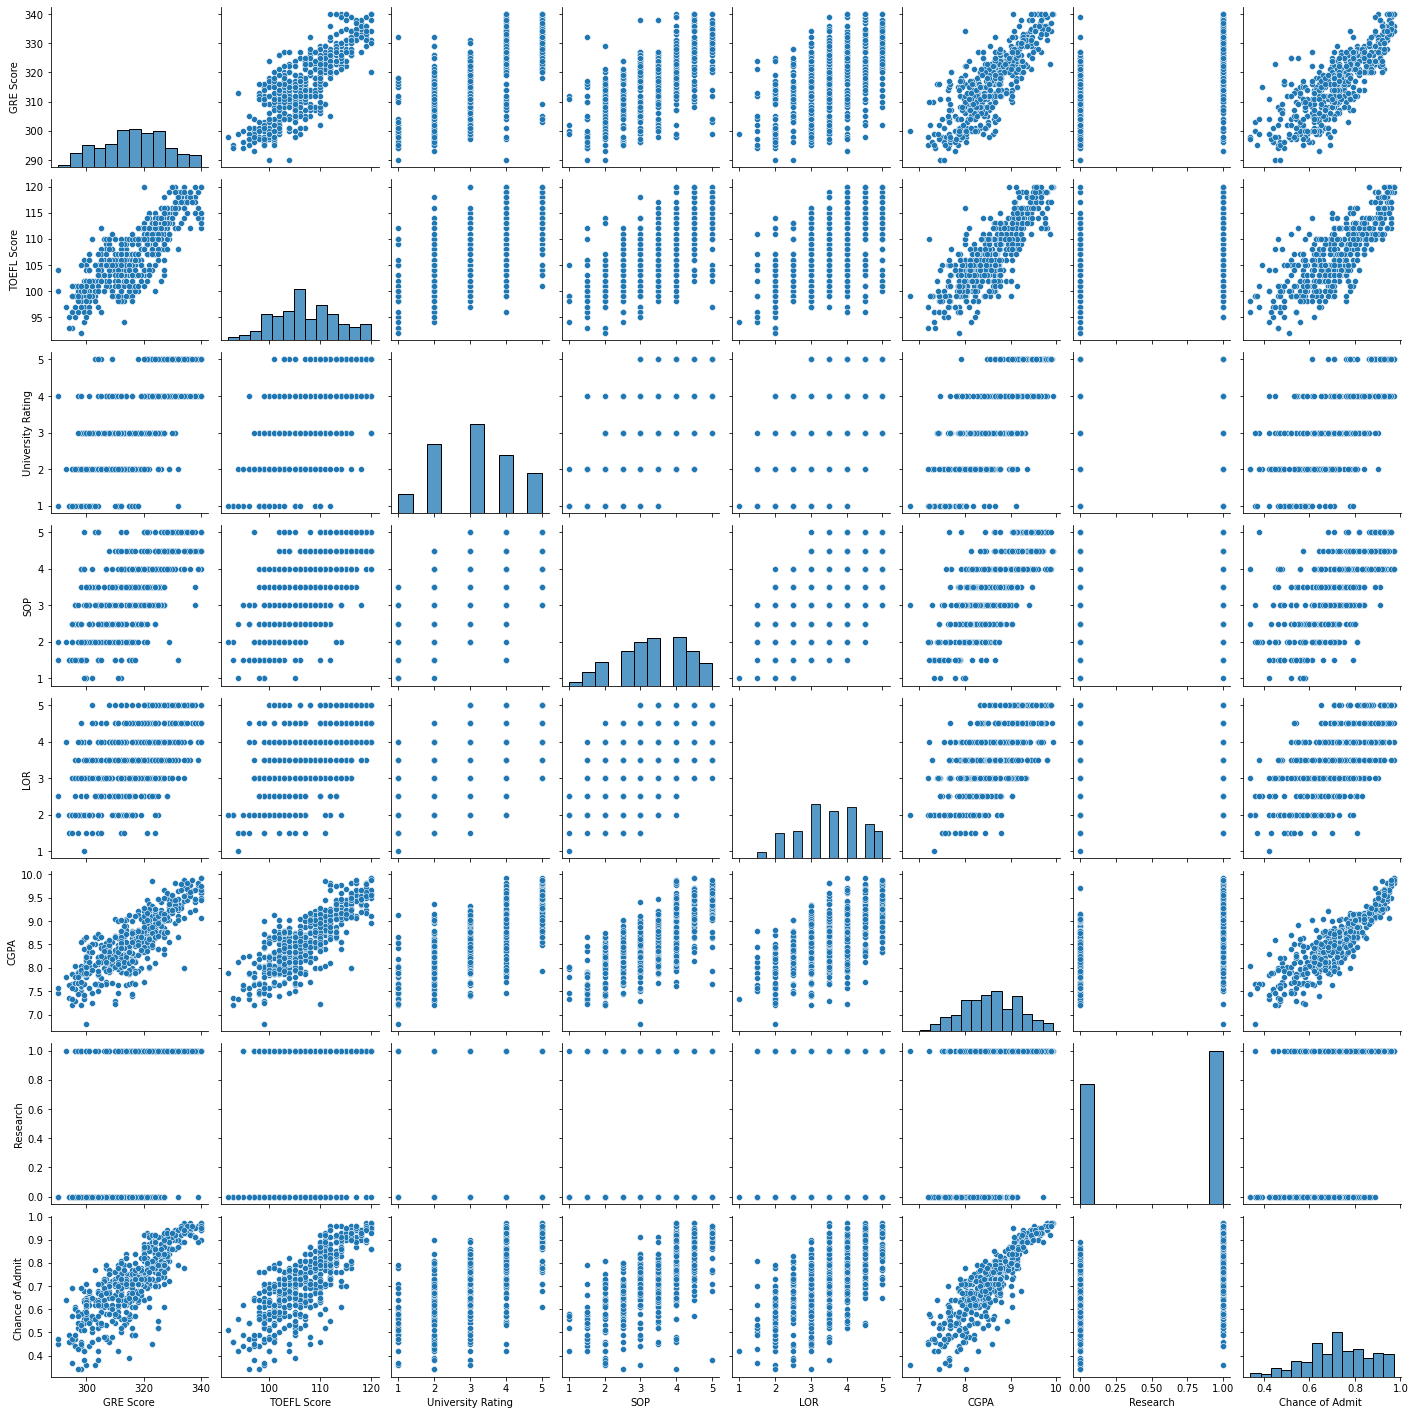

In [20]:
sns.pairplot(data=df)

## Feature engineering 

In [21]:
df2 = df.copy()

In [22]:
df['SOP+LOR'] = df['SOP']+df['LOR ']

In [23]:
df.drop(['SOP', 'LOR '], axis=1, inplace=True)

In [24]:
y = df['Chance of Admit ']
x = df.drop(['Chance of Admit '], axis=1, inplace=False)

In [25]:
# y2 = df['Chance of Admit ']
# x2 = df.drop(['Chance of Admit '], axis=1, inplace=False)

## Data Preparation

In [50]:
feature_names = [
    'X0',
    'GRE Score',
 'TOEFL Score',
 'University Rating',
 'CGPA',
 'Research',
 'SOP+LOR']

#### Data Splitting

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

In [27]:
# X2_train, X2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.2)
# X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train,y2_train,test_size=0.2)

#### Normalization

In [28]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_normalize = standard_scaler.transform(X_train)
X_test_normalize =  standard_scaler.transform(X_test)
X_val_normalize = standard_scaler.transform(X_val)

In [29]:
# standard_scaler2 = StandardScaler()
# standard_scaler2.fit(X2_train)
# X2_train_normalize = standard_scaler2.transform(X2_train)
# X2_test_normalize =  standard_scaler2.transform(X2_test)
# X2_val_normalize = standard_scaler2.transform(X2_val)

### Model

In [30]:
#adding Bias term
X_train_normalize_with_constant = sm.add_constant(X_train_normalize)
model = sm.OLS(y_train, X_train_normalize_with_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 25 Jan 2023   Prob (F-statistic):          5.22e-116
Time:                        18:37:24   Log-Likelihood:                 447.27
No. Observations:                 320   AIC:                            -880.5
Df Residuals:                     313   BIC:                            -854.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7296      0.003    215.819      0.0

In [31]:
X_val_normalize_with_constant = sm.add_constant(X_val_normalize) 
val_predict = model.predict(X_val_normalize_with_constant)
print("Mean Squared Error ",mse(val_predict,y_val))
print("Root Mean Squared Error ",rmse(val_predict,y_val))
print('R2_Score: ', r2_score(y_val, val_predict))

Mean Squared Error  0.00423806452288236
Root Mean Squared Error  0.06510041876119048
R2_Score:  0.7606255652927965


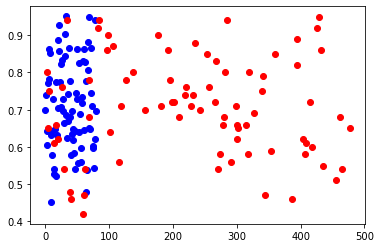

In [32]:
plt.plot(val_predict,'bo')
plt.plot(y_val,'o', color='red')

In [33]:
# #adding Bias term
# X2_train_normalize_with_constant = sm.add_constant(X2_train_normalize)
# model2 = sm.OLS(y2_train, X2_train_normalize_with_constant).fit()
# print(model2.summary())

In [34]:
# X2_val_normalize_with_constant = sm.add_constant(X2_val_normalize) 
# val_predict2 = model2.predict(X2_val_normalize_with_constant)
# print("Mean Squared Error ",mse(val_predict2,y2_val))
# print("Root Mean Squared Error ",rmse(val_predict2,y2_val))

In [35]:
# plt.plot(val_predict2,'bo')
# plt.plot(y2_val,'o', color='red');

### Model Using SkLearn

In [36]:
model_reg = LinearRegression()
model_reg.fit(X_train_normalize_with_constant,y_train)
val_predict_reg = model.predict(X_val_normalize_with_constant)

In [37]:
print('Intercept: ', model_reg.intercept_)
print('Coeficient: ', model_reg.coef_)
print('R2_Score: ', r2_score(y_val, val_predict_reg))
print("Mean Squared Error ",mse(val_predict_reg,y_val))
print("Root Mean Squared Error ",rmse(val_predict_reg,y_val))
n = len(X_val_normalize_with_constant)
p = len(X_val_normalize_with_constant[0])
Adjusted_r2_score = 1-((1-r2_score(y_val, val_predict_reg))*(n-1))/(n-p-1)
print('Adjusted R2_Score: ', Adjusted_r2_score)

Intercept:  0.7295624999999999
Coeficient:  [0.         0.0187915  0.01375673 0.00369642 0.07485604 0.00867714
 0.02509909]
R2_Score:  0.7606255652927965
Mean Squared Error  0.00423806452288236
Root Mean Squared Error  0.06510041876119048
Adjusted R2_Score:  0.7373530508073739


In [38]:
X_train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA', 'Research',
       'SOP+LOR'],
      dtype='object')

<AxesSubplot:>

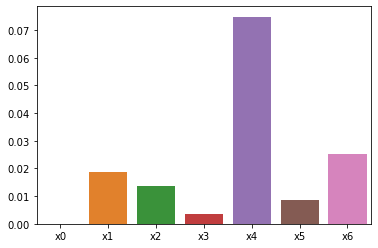

In [39]:
sns.barplot(['x'+ str(i) for i in range(len(model_reg.coef_))],model_reg.coef_)

## Testing the assumptions of the linear regression model 

- Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)
- The mean of residuals is nearly zero
- Linearity of variables (no pattern in the residual plot)
- Test for Homoscedasticity
- Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)

### MultiCollinearity

Multicollinearity occurs when <b>independent variables in a regression model are correlated</b>. 

This correlation is a problem because independent variables should be independent. 
If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.



Multicollinearity causes the following two basic types of problems:

- The <b>coefficient estimates can swing wildly</b> based on which other independent variables are in the model. The <b>coefficients become very sensitive</b> to small changes in the model.
- Multicollinearity <b>reduces the precision of the estimated coefficients</b>, which <b>weakens the statistical power of your regression model</b>. You might not be able to trust the p-values to identify independent variables that are statistically significant.


The <b>need to reduce multicollinearity</b> depends on its severity and your primary goal for your regression model. 

Keep the following three points in mind:

1. The severity of the problems increases with the degree of the multicollinearity. Therefore, if you have only moderate multicollinearity, you may not need to resolve it.

2. Multicollinearity affects only the specific independent variables that are correlated. Therefore, if multicollinearity is not present for the independent variables that you are particularly interested in, you may not need to resolve it. Suppose your model contains the experimental variables of interest and some control variables. If high multicollinearity exists for the control variables but not the experimental variables, then you can interpret the experimental variables without problems.

3. <b>Multicollinearity</b> affects the coefficients and p-values, but it <b>does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. </b> If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

In [52]:
VIF = pd.DataFrame()
VIF['Features'] = feature_names
VIF['VIF_Value'] = [variance_inflation_factor(X_val_normalize_with_constant, i) for i in range(X_val_normalize_with_constant.shape[1])]
VIF['VIF_Value'] = round(VIF['VIF_Value'],2)
VIF

,Features,VIF_Value
0,X0,1.07
1,GRE Score,4.24
2,TOEFL Score,3.32
3,University Rating,2.60
4,CGPA,4.17
5,Research,1.57
6,SOP+LOR,3.11


In [54]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption: Little to no multicollinearity among predictors


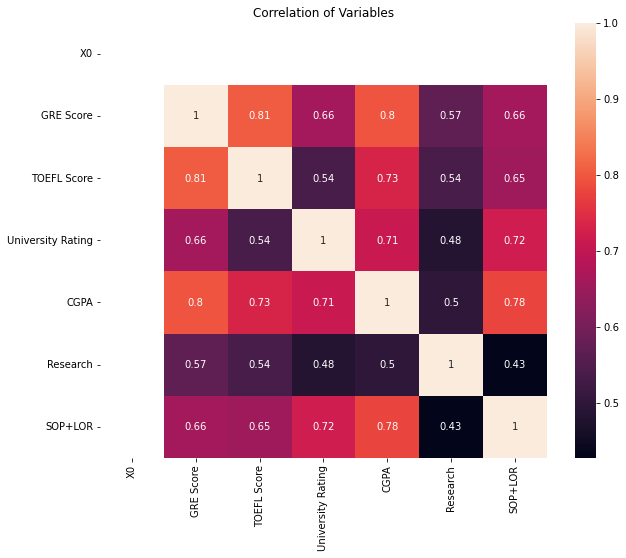

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X0: 1.0678145277662916
GRE Score: 4.235821305762121
TOEFL Score: 3.3240881002962777
University Rating: 2.6016129217605433
CGPA: 4.165129717977011
Research: 1.5735514401718356
SOP+LOR: 3.105551965312803

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [55]:
multicollinearity_assumption(model_reg, X_val_normalize_with_constant, y_val, feature_names=feature_names)

### mean of residuals is nearly zero

In [56]:
def calculate_residuals(model, X, Y):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(X)
    df_results = pd.DataFrame({'Actual': Y, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [57]:
#for statsModel
print(model.resid.mean())

1.0408340855860842e-18


In [58]:
#for sklearn
print((y_val-val_predict_reg).mean())

-0.004479560994496858


In [59]:
print(calculate_residuals(model_reg, X_val_normalize_with_constant, y_val)['Residuals'].mean())

-0.004479560994496886


### Linearity of variables (no pattern in the residual plot)

To detect nonlinearity one can inspect <b>plots of observed vs. predicted values or residuals vs. predicted values</b>. 

The desired outcome:
- <b>points are symmetrically distributed around a diagonal line in the observed vs. predicted values plot
- <b>points are symmetrically distributed around a horizontal line in the residuals vs. predicted values plot
    
In both cases with a roughly constant variance.
    
    
- Observing a ‘bowed’ pattern indicates that the model makes systematic errors whenever it is making unusually large or small predictions. 
    

    
&#10148; Potential solutions:

- non-linear transformations to dependent/independent variables (Either adding polynomial terms to some of the predictors or applying nonlinear transformations)
- adding extra features which are a transformation of the already used ones (for example squared version)
- adding features that were not considered before

In [60]:
val_predict.shape

(80,)

In [61]:
model.resid

185    0.031873
424    0.007172
265    0.028662
470    0.021480
88    -0.032893
         ...   
442    0.008469
269    0.058395
249   -0.015489
152    0.002807
452    0.010971
Length: 320, dtype: float64

In [86]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(y='Actual', x='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


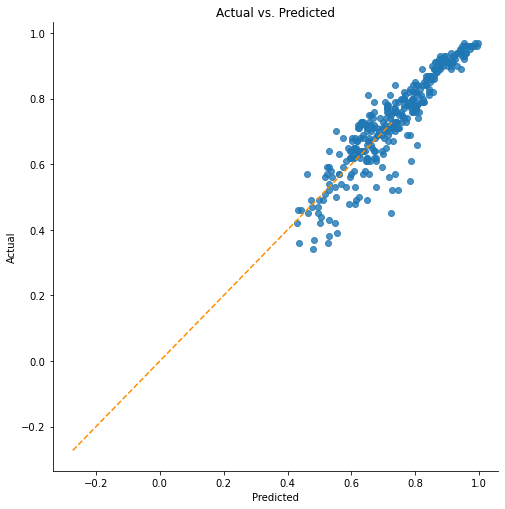

In [87]:
linear_assumption(model_reg, X_train_normalize_with_constant, y_train)

In [64]:
def linearity_test(model, y, sklearn=False, X=[]):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    if not sklearn:
        fitted_vals = model.predict()
        resids = model.resid
        fig, ax = plt.subplots(1,2, figsize=(15,8))

        sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
        ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
        ax[0].set(xlabel='Predicted', ylabel='Observed')

        sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
        ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
        ax[1].set(xlabel='Predicted', ylabel='Residuals')  
    else:
        fitted_vals = model.predict(X)
        resids = calculate_residuals(model_reg, X, y)['Residuals'].values
#         resids = y-fitted_vals
        fig, ax = plt.subplots(1,2, figsize=(15,8))

        sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
        ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
        ax[0].set(xlabel='Predicted', ylabel='Observed')

        sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
        ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
        ax[1].set(xlabel='Predicted', ylabel='Residuals') 

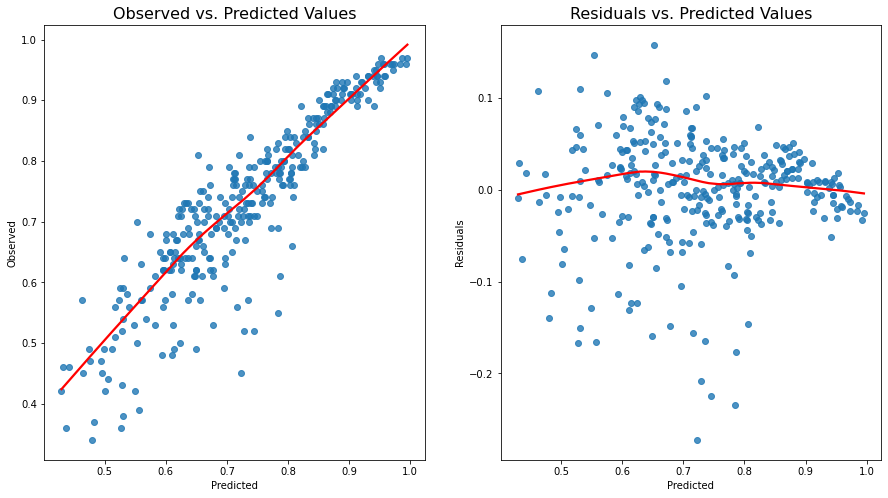

In [65]:
linearity_test(model_reg, y_train, sklearn=True, X=X_train_normalize_with_constant)   

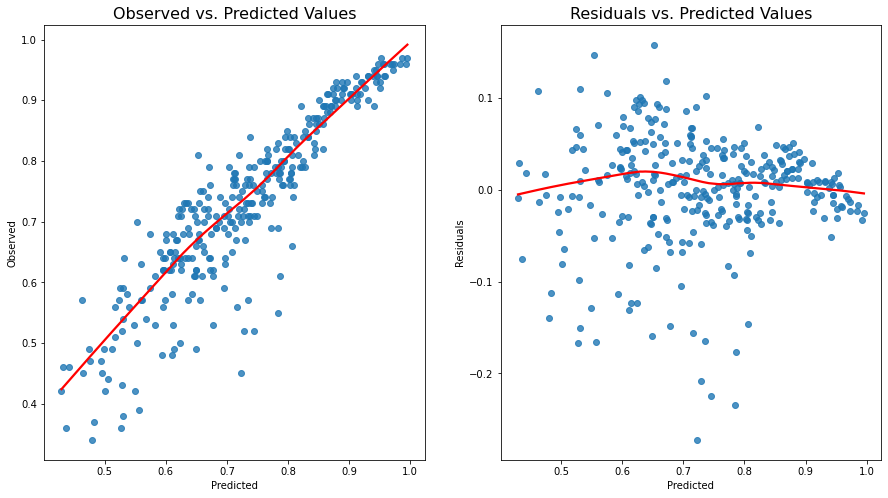

In [66]:
linearity_test(model, y_train)

### Test for Homoscedasticity


- <b>When residuals do not have constant variance</b> (they exhibit heteroscedasticity), it is difficult to determine the true standard deviation of the forecast errors, usually resulting in confidence intervals that are too wide/narrow. 

Another effect of heteroscedasticity might also be putting too much weight to a subset of data when estimating coefficients — the subset in which the error variance was largest.

***

To investigate if the residuals are homoscedastic, we can look at a plot of residuals (or standardized residuals) vs. predicted (fitted) values. 
- What should alarm us is the case when the residuals grow either as a function of predicted value or time (in case of time series). 
- To identify homoscedasticity in the plots, the placement of the points should be random and no pattern (increase/decrease in values of residuals) should be visible.

In simple words, Plot the residuals and see if the variance appears to be uniform.

***


We can also use two statistical tests: Breusch-Pagan and Goldfeld-Quandt. In both of them, the null hypothesis assumes homoscedasticity and a p-value below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.

***
***
Goldfeld Quandt Test

Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

<b>
&#10148; Null Hypothesis: Error terms are homoscedastic
 
&#10148; Alternative Hypothesis: Error terms are heteroscedastic
</b>

<b>p-value should be less than 0.05 to be able to reject the null hypothesis.</b>
***
***
Breusch-Pagan Test
The Breusch-Pagan test is used to determine whether or not heteroscedasticity is present in a regression model.

<b>
&#10148; Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)

&#10148; Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)
</b>

If the p-value of the test is less than some significance level (i.e. α = .05) then we reject the null hypothesis and conclude that heteroscedasticity is present in the regression model.
***
***


<b>How to Solve:</b>
Heteroscedasticity an be solved either by <b>using weighted least squares regression</b> instead of the standard OLS or <b>transforming either the dependent or highly skewed variables</b>. <u>Performing a log transformation</u> on the dependent variable is not a bad place to start.

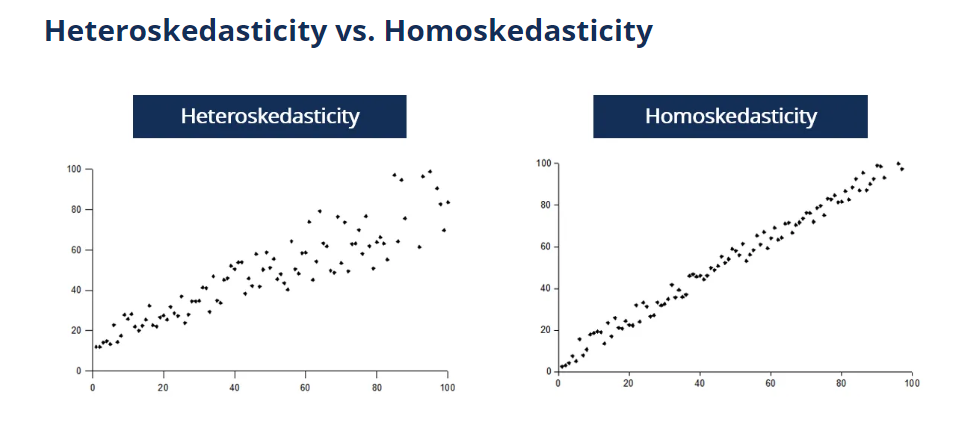

In [69]:
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2, figsize=(15,8))

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')


 Breusch-Pagan test ----
                                   value
Lagrange multiplier statistic  25.614182
p-value                         0.000263
f-value                         4.538964
f p-value                       0.000198

 Goldfeld-Quandt test ----
                value
F statistic  1.002470
p-value      0.493922

 Residuals plots ----


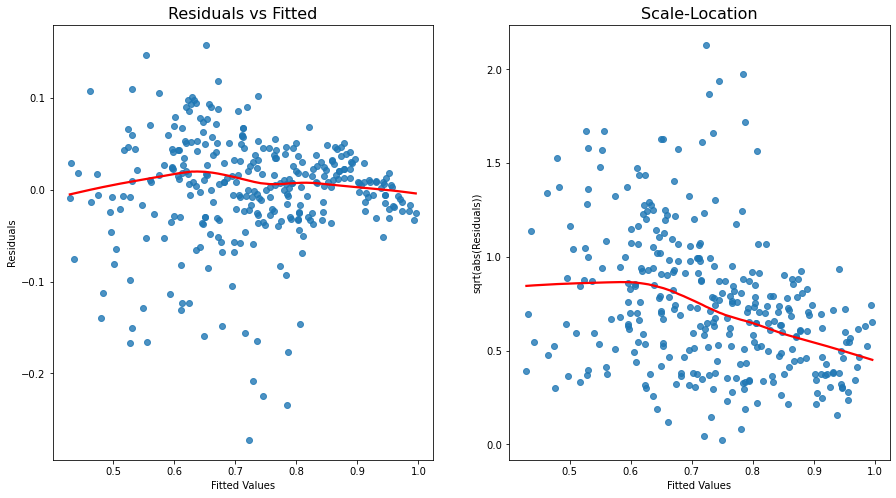

In [70]:
homoscedasticity_test(model)

In [80]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  
    
    
    #checking goldfeldquandt
    bp_test = pd.DataFrame(sms.het_breuschpagan(df_results.Residuals, features), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(df_results.Residuals, features)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])
    
    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)

Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


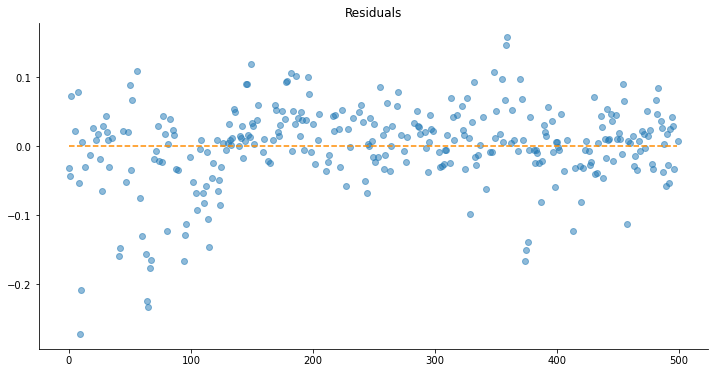


 Breusch-Pagan test ----
                                   value
Lagrange multiplier statistic  25.614182
p-value                         0.000263
f-value                         4.538964
f p-value                       0.000198

 Goldfeld-Quandt test ----
                value
F statistic  1.002470
p-value      0.493922


In [81]:
homoscedasticity_assumption(model_reg, X_train_normalize_with_constant, y_train)

<div class="alert alert-success">
    <h3>Observation</h3>
        <p> &#10148; p value in Goldfeld Quandt Test is more than 0.05, we can't reject it's null hypothesis that error terms are homoscedastic. Good.</p>    
    <p> &#10148; p value in Breusch Pagan Test is less than 0.05, we can reject it's null hypothesis that Homoscedasticity is present. Bad.</p>   
</div>

### Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)

Linear Regression assumes that the <b>error terms of the model are normally distributed</b>
- happen if either the predictors or the label are significantly non-normal. Other potential reasons could include the linearity assumption being violated or outliers affecting our model.
- cause issues with either shrinking or inflating our confidence intervals.

<b>How to Check/Detect it: </b>
- look at both a histogram and the p-value from the Anderson-Darling test for normality.

<b>How to Solve it: </b>

-  Nonlinear transformations of the variables, excluding specific variables (such as long-tailed variables), or removing outliers may solve this problem.

In [84]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 2.4933168478097685e-16
Residuals are not normally distributed


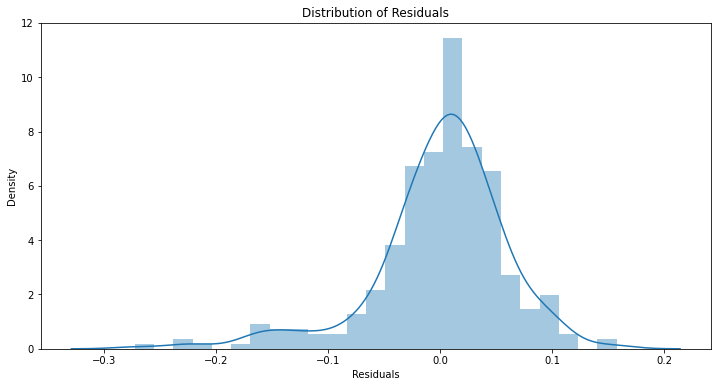


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [85]:
normal_errors_assumption(model_reg, X_train_normalize_with_constant, y_train)

In [88]:
score = []
for i in np.arange(0.001,1.0,0.001):
    lasso_model = Lasso(alpha=i)
    lasso_model.fit(X_train_normalize_with_constant,y_train)
    score.append(lasso_model.score(X_val_normalize_with_constant,y_val))
print("Max Score & Index :",score[np.argmax(score)],np.argmax(score))


Max Score & Index : 0.7604862886642081 0


In [89]:
score = []
for i in np.arange(0.001,1.0,0.001):
    Ridge_model = Ridge(alpha=i)
    Ridge_model.fit(X_train_normalize_with_constant,y_train)
    score.append(Ridge_model.score(X_val_normalize_with_constant,y_val))
print("Max Score & Index  :",score[np.argmax(score)],np.argmax(score))


Max Score & Index  : 0.760897483199561 998


### Metrics checked - MAE, RMSE, R2, Adj R2MAE, RMSE, R2, Adj R2

In [91]:
X_test_normalize_with_constant = sm.add_constant(X_test_normalize)
pred_test = model.predict(X_test_normalize_with_constant)

print("Mean Squared Error ",mse(pred_test,y_test))
print("Root Mean Squared Error ",rmse(pred_test,y_test))
n = len(X_test_normalize_with_constant)
p = len(X_test_normalize_with_constant[0])
Adjusted_r2_score = 1-((1-r2_score(y_test, pred_test))*(n-1))/(n-p-1)
print('R2_Score: ', r2_score(y_test, pred_test))
print('Adjusted R2_Score: ', Adjusted_r2_score)


Mean Squared Error  0.0032205986081762423
Root Mean Squared Error  0.05675031813281968
R2_Score:  0.8264661767217879
Adjusted R2_Score:  0.8132625162549674


In [102]:
X_test_normalize_with_constant = sm.add_constant(X_test_normalize)
pred_test = model_reg.predict(X_test_normalize_with_constant)

print("Mean Squared Error ",mse(pred_test,y_test))
print("Root Mean Squared Error ",rmse(pred_test,y_test))
n = len(X_test_normalize_with_constant)
p = len(X_test_normalize_with_constant[0])
Adjusted_r2_score = 1-((1-r2_score(y_test, pred_test))*(n-1))/(n-p-1)
print('R2_Score: ', r2_score(y_test, pred_test))
print('Adjusted R2_Score: ', Adjusted_r2_score)

Mean Squared Error  0.003220598608176243
Root Mean Squared Error  0.05675031813281969
R2_Score:  0.8264661767217879
Adjusted R2_Score:  0.8132625162549674
